# Welcome To The Practice Notebook 
---

Importing the pandas library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='ticks')

Import the json Imdb Dataset

In [2]:
# Your code goes here
df = pd.read_json('movies_dataset.json', lines=False)
df.columns = [c.strip().lower().replace(' ', '_') for c in df.columns]

Answer to the following Analytical questions: 

Question 1: Which country has gained the highest average IMdb Score according to our data? <br>
Use a bar chart to visualize your results

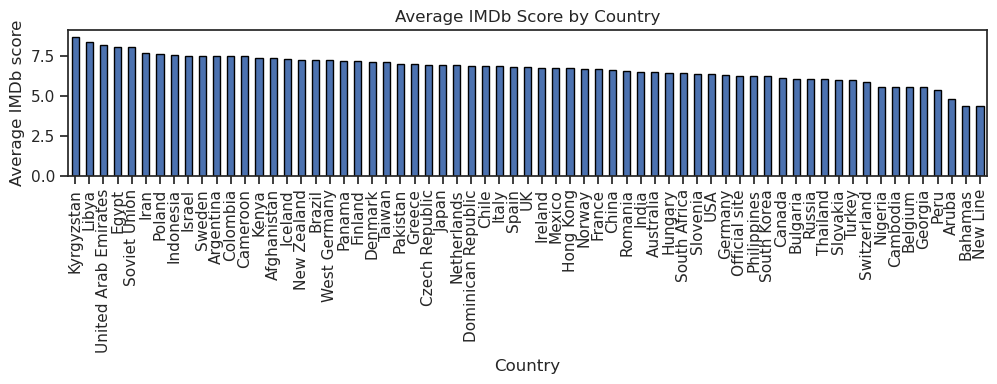

In [3]:
# Write your code here
avg_by_country = (
    df.dropna(subset=['country','imdb_score'])
      .assign(country=df['country'].astype(str))
      .groupby('country')['imdb_score'].mean()
      .sort_values(ascending=False)
)
ax = avg_by_country.plot(kind='bar', figsize=(10,4), color='#4C72B0', edgecolor='black')
ax.set_xlabel('Country')
ax.set_ylabel('Average IMDb score')
ax.set_title('Average IMDb Score by Country')
ax.grid(False)
plt.tight_layout()
plt.show()

Question 2: How many `colored` and `Black&White` movies do we have in our dataset?

In [4]:
# Write your code here
color_norm = df['color'].str.strip().str.lower()
labels = color_norm.where(~color_norm.str.contains('black', na=False), 'black & white')
labels = labels.where(~color_norm.str.contains('color', na=False), 'color')
counts = labels.value_counts(dropna=True)
print(counts)

color            4815
black & white     209
Name: color, dtype: int64


Question 3: Which movies of `Christopher Nolan` has the highest IMdb Score? <br>
Use a barchart to visualize the results

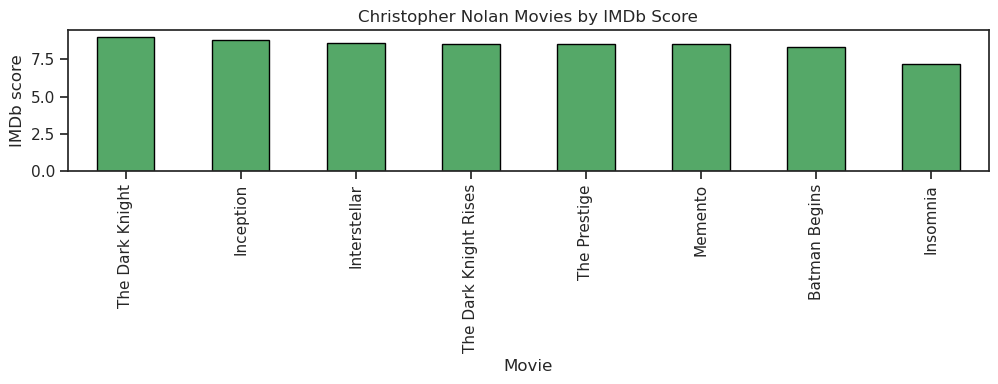

In [5]:
# Write your code here
nolan = df[df['director_name'].str.contains('Christopher Nolan', case=False, na=False)]
top_nolan = nolan[['movie_title','imdb_score']].dropna().sort_values('imdb_score', ascending=False)
ax = top_nolan.set_index('movie_title')['imdb_score'].plot(kind='bar', figsize=(10,4), color='#55A868', edgecolor='black')
ax.set_xlabel('Movie')
ax.set_ylabel('IMDb score')
ax.set_title('Christopher Nolan Movies by IMDb Score')
ax.grid(False)
plt.tight_layout()
plt.show()

Question 4: Use a line chart to visualize how many movies have been produced in `USA` from `2010` to `2015`. 

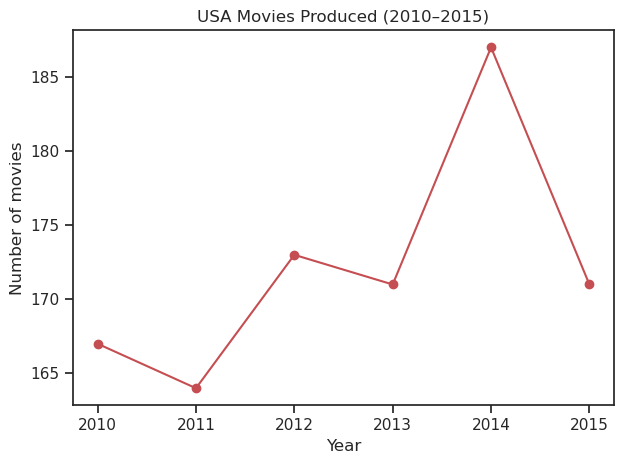

In [6]:
# Write your code here
usa = df[df['country'].astype(str).str.contains('USA', case=False, na=False)]
year_col = 'title_year' if 'title_year' in df.columns else ('year' if 'year' in df.columns else None)
if year_col is None:
    raise KeyError('No year column found. Expected title_year or year')

usa_year = usa.dropna(subset=[year_col]).copy()
usa_year[year_col] = usa_year[year_col].astype(int)

window = usa_year[usa_year[year_col].between(2010, 2015)]
counts = window.groupby(year_col).size().sort_index()

ax = counts.plot(kind='line', marker='o', color='#C44E52')
ax.set_xlabel('Year')
ax.set_ylabel('Number of movies')
ax.set_title('USA Movies Produced (2010–2015)')
ax.grid(False)
plt.tight_layout()
plt.show()
